# 🔋 Milestone 1: Smart Energy Consumption Analysis

## Week 1-2: Data Collection, Understanding & Preprocessing

---

### 📌 Project Scope & Objectives

This notebook implements **Milestone 1** of the AI/ML-Driven Analysis and Forecasting of Device-Level Energy Consumption project.

#### Module 1: Data Collection and Understanding
- ✅ Define project scope and functional objectives for smart energy analysis
- ✅ Collect and structure the SmartHome Energy Monitoring Dataset
- ✅ Verify data integrity, handle missing timestamps, and perform exploratory analysis
- ✅ Organize energy readings by device, room, and timestamp

#### Module 2: Data Cleaning and Preprocessing
- ✅ Handle missing values and outliers in power consumption readings
- ✅ Convert timestamps to datetime format and resample data (hourly/daily)
- ✅ Normalize or scale energy values for model compatibility
- ✅ Split dataset into training, validation, and testing sets

---

**Author:** Suraj Surve  
**Date:** January 2026  
**Infosys Springboard Internship - Project 1**

---

## 1️⃣ Import Libraries & Configuration

In [1]:
# Data Manipulation & Analysis
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Preprocessing & ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats

# Create images directory if not exists
import os
os.makedirs('images', exist_ok=True)

print("✅ All libraries imported successfully!")
print(f"📦 Pandas version: {pd.__version__}")
print(f"📦 NumPy version: {np.__version__}")

✅ All libraries imported successfully!
📦 Pandas version: 2.3.3
📦 NumPy version: 2.2.6


---

## 2️⃣ Module 1: Data Collection and Understanding

### 2.1 Dataset Description

The **Individual Household Electric Power Consumption Dataset** contains:
- **Source:** UCI Machine Learning Repository
- **Period:** December 2006 - November 2010 (~4 years)
- **Granularity:** 1-minute sampling rate
- **Records:** ~2 million measurements

#### Feature Descriptions:
| Feature | Description | Unit |
|---------|-------------|------|
| `Global_active_power` | Total active power consumed | kilowatt (kW) |
| `Global_reactive_power` | Total reactive power consumed | kilowatt (kW) |
| `Voltage` | Minute-averaged voltage | volt (V) |
| `Global_intensity` | Current intensity | ampere (A) |
| `Sub_metering_1` | Kitchen appliances (dishwasher, oven, microwave) | watt-hour (Wh) |
| `Sub_metering_2` | Laundry room (washing machine, dryer, refrigerator) | watt-hour (Wh) |
| `Sub_metering_3` | Climate control (water heater, AC) | watt-hour (Wh) |

### 2.2 Load Dataset

In [2]:
# Load the dataset
# Dataset uses semicolon separator and '?' for missing values
df = pd.read_csv('household_power_consumption.txt', 
                 sep=';', 
                 na_values=['?', ''],
                 low_memory=False)

# Display loading summary
print("=" * 60)
print("📊 DATASET LOADED SUCCESSFULLY!")
print("=" * 60)
print(f"\n📏 Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"💾 Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n📋 Column Names:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i}. {col}")

print("\n🔍 First 5 rows:")
df.head()

📊 DATASET LOADED SUCCESSFULLY!

📏 Shape: 2,075,259 rows × 9 columns


💾 Memory Usage: 338.33 MB

📋 Column Names:
   1. Date
   2. Time
   3. Global_active_power
   4. Global_reactive_power
   5. Voltage
   6. Global_intensity
   7. Sub_metering_1
   8. Sub_metering_2
   9. Sub_metering_3

🔍 First 5 rows:


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


### 2.3 Data Integrity Verification

In [3]:
# Check data types and info
print("📊 Dataset Information:")
print("=" * 60)
df.info()

print("\n" + "=" * 60)
print("📈 Statistical Summary:")
print("=" * 60)
df.describe()

📊 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB

📈 Statistical Summary:


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [4]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"🔄 Duplicate rows: {duplicate_count:,}")

# Check date range
print(f"\n📅 Date Range: {df['Date'].min()} to {df['Date'].max()}")

🔄 Duplicate rows: 0



📅 Date Range: 1/1/2007 to 9/9/2010


### 2.4 Missing Values Analysis

In [5]:
# Comprehensive missing values analysis
print("🔍 Missing Values Analysis:")
print("=" * 60)

missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage (%)': missing_percent
})
print(missing_df)

total_missing = df.isnull().sum().sum()
rows_with_missing = df.isnull().any(axis=1).sum()

print(f"\n📊 Total missing values: {total_missing:,}")
print(f"📊 Rows with missing values: {rows_with_missing:,} ({rows_with_missing/len(df)*100:.2f}%)")

# Store missing values count for before/after comparison
missing_before = df.isnull().sum().sum()

🔍 Missing Values Analysis:


                       Missing Count  Percentage (%)
Date                               0            0.00
Time                               0            0.00
Global_active_power            25979            1.25
Global_reactive_power          25979            1.25
Voltage                        25979            1.25
Global_intensity               25979            1.25
Sub_metering_1                 25979            1.25
Sub_metering_2                 25979            1.25
Sub_metering_3                 25979            1.25



📊 Total missing values: 181,853
📊 Rows with missing values: 25,979 (1.25%)


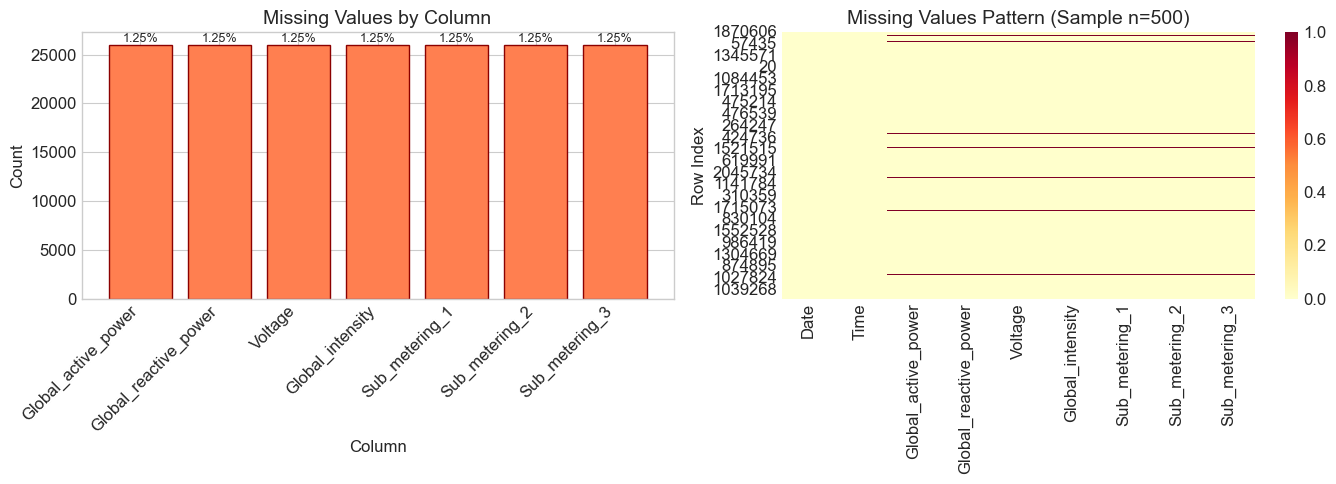

✅ Image saved: images/01_missing_values_analysis.png


In [6]:
# Visualize missing values
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Missing values bar chart
missing_cols = missing_df[missing_df['Missing Count'] > 0]
ax1 = axes[0]
bars = ax1.bar(range(len(missing_cols)), missing_cols['Missing Count'], color='coral', edgecolor='darkred')
ax1.set_xticks(range(len(missing_cols)))
ax1.set_xticklabels(missing_cols.index, rotation=45, ha='right')
ax1.set_ylabel('Count')
ax1.set_title('Missing Values by Column')
ax1.set_xlabel('Column')
for bar, pct in zip(bars, missing_cols['Percentage (%)']):
    ax1.annotate(f'{pct}%', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                 ha='center', va='bottom', fontsize=9)

# Missing pattern heatmap (sample for visualization)
ax2 = axes[1]
sample_size = min(500, len(df))
sample_df = df.sample(sample_size, random_state=42)
sns.heatmap(sample_df.isnull(), cbar=True, cmap='YlOrRd', ax=ax2)
ax2.set_title(f'Missing Values Pattern (Sample n={sample_size})')
ax2.set_ylabel('Row Index')

plt.tight_layout()
plt.savefig('images/01_missing_values_analysis.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Image saved: images/01_missing_values_analysis.png")

### 2.5 Device-Level Energy Organization

The sub-metering columns represent different areas/devices in the household:

In [7]:
# Device mapping
device_mapping = {
    'Sub_metering_1': 'Kitchen (dishwasher, oven, microwave)',
    'Sub_metering_2': 'Laundry (washing machine, dryer, refrigerator)',
    'Sub_metering_3': 'Climate Control (water heater, AC)'
}

print("🏠 Device-Level Energy Organization:")
print("=" * 60)
for col, description in device_mapping.items():
    print(f"   {col}: {description}")

# Convert numeric columns to proper types
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
                'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Device-wise statistics
print("\n📊 Device-wise Statistics:")
print("=" * 60)
for col, device in device_mapping.items():
    values = df[col].dropna()
    print(f"\n   {device}:")
    print(f"      Mean: {values.mean():.2f} Wh")
    print(f"      Max: {values.max():.2f} Wh")
    print(f"      Min: {values.min():.2f} Wh")
    print(f"      Std Dev: {values.std():.2f} Wh")

🏠 Device-Level Energy Organization:
   Sub_metering_1: Kitchen (dishwasher, oven, microwave)
   Sub_metering_2: Laundry (washing machine, dryer, refrigerator)
   Sub_metering_3: Climate Control (water heater, AC)

📊 Device-wise Statistics:

   Kitchen (dishwasher, oven, microwave):
      Mean: 1.12 Wh
      Max: 88.00 Wh
      Min: 0.00 Wh
      Std Dev: 6.15 Wh



   Laundry (washing machine, dryer, refrigerator):


      Mean: 1.30 Wh
      Max: 80.00 Wh
      Min: 0.00 Wh
      Std Dev: 5.82 Wh

   Climate Control (water heater, AC):
      Mean: 6.46 Wh
      Max: 31.00 Wh
      Min: 0.00 Wh
      Std Dev: 8.44 Wh


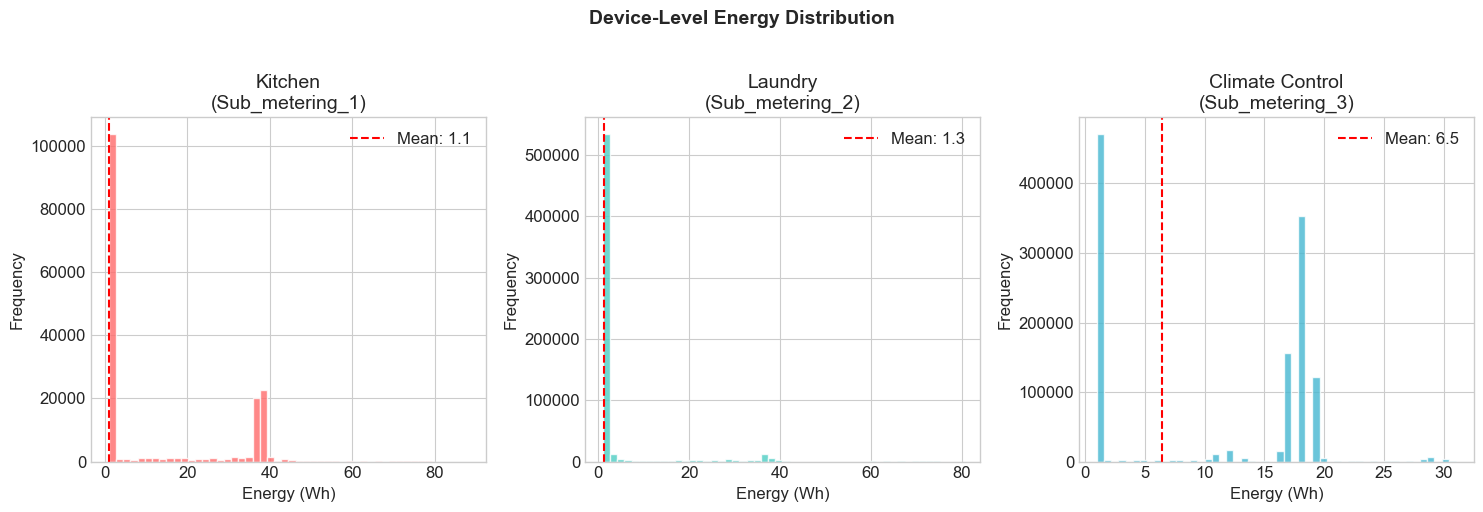

✅ Image saved: images/02_device_level_distribution.png


In [8]:
# Visualize device-level distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
sub_cols = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
titles = ['Kitchen', 'Laundry', 'Climate Control']

for i, (col, title, color) in enumerate(zip(sub_cols, titles, colors)):
    ax = axes[i]
    data = df[col].dropna()
    ax.hist(data[data > 0], bins=50, color=color, edgecolor='white', alpha=0.8)
    ax.set_title(f'{title}\n({col})')
    ax.set_xlabel('Energy (Wh)')
    ax.set_ylabel('Frequency')
    ax.axvline(data.mean(), color='red', linestyle='--', label=f'Mean: {data.mean():.1f}')
    ax.legend()

plt.suptitle('Device-Level Energy Distribution', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('images/02_device_level_distribution.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Image saved: images/02_device_level_distribution.png")

---

## 3️⃣ Module 2: Data Cleaning and Preprocessing

### 3.1 DateTime Processing

In [9]:
# Create DateTime column
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

# Set DateTime as index
df.set_index('DateTime', inplace=True)

# Drop original Date and Time columns
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Sort by index
df.sort_index(inplace=True)

print("✅ DateTime index created!")
print(f"📅 Date Range: {df.index.min()} to {df.index.max()}")
print(f"📆 Total Duration: {(df.index.max() - df.index.min()).days} days")
print(f"\n📊 Data Shape: {df.shape}")
df.head()

✅ DateTime index created!
📅 Date Range: 2006-12-16 17:24:00 to 2010-11-26 21:02:00
📆 Total Duration: 1441 days

📊 Data Shape: (2075259, 7)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


### 3.2 Missing Values Handling (Multiple Strategies)

In [10]:
print("🔧 Handling Missing Values with Multiple Strategies...")
print("=" * 60)
print(f"   Before: {df.isnull().sum().sum():,} missing values")

# Strategy 1: Linear interpolation (best for time-series)
df_cleaned = df.copy()
df_cleaned = df_cleaned.interpolate(method='linear', limit_direction='both')

# Strategy 2: Forward fill for any remaining NaNs
df_cleaned = df_cleaned.ffill()

# Strategy 3: Backward fill for any remaining NaNs at the start
df_cleaned = df_cleaned.bfill()

missing_after = df_cleaned.isnull().sum().sum()
print(f"   After: {missing_after:,} missing values")
print("\n✅ Missing values handled successfully!")

# Verify no missing values remain
print("\n📊 Missing Values Check (After Cleaning):")
print(df_cleaned.isnull().sum())

🔧 Handling Missing Values with Multiple Strategies...
   Before: 181,853 missing values


   After: 0 missing values

✅ Missing values handled successfully!

📊 Missing Values Check (After Cleaning):


Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


### 3.3 Outlier Detection & Treatment

In [11]:
print("🔍 Outlier Detection using IQR Method:")
print("=" * 60)

def detect_outliers_iqr(data, column):
    """Detect outliers using IQR method."""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Detect outliers for each numeric column
outlier_summary = []
for col in numeric_cols:
    count, lower, upper = detect_outliers_iqr(df_cleaned, col)
    pct = (count / len(df_cleaned)) * 100
    outlier_summary.append({
        'Column': col,
        'Outliers': count,
        'Percentage': f'{pct:.2f}%',
        'Lower Bound': f'{lower:.2f}',
        'Upper Bound': f'{upper:.2f}'
    })
    print(f"   {col}: {count:,} outliers ({pct:.2f}%)")

outlier_df = pd.DataFrame(outlier_summary)
outlier_df

🔍 Outlier Detection using IQR Method:


   Global_active_power: 95,238 outliers (4.59%)


   Global_reactive_power: 40,478 outliers (1.95%)


   Voltage: 52,195 outliers (2.52%)


   Global_intensity: 100,979 outliers (4.87%)


   Sub_metering_1: 172,247 outliers (8.30%)


   Sub_metering_2: 77,166 outliers (3.72%)


   Sub_metering_3: 0 outliers (0.00%)


,Column,Outliers,Percentage,Lower Bound,Upper Bound
0,Global_active_power,95238,4.59%,-1.52,3.35
1,Global_reactive_power,40478,1.95%,-0.17,0.41
2,Voltage,52195,2.52%,233.17,248.69
3,Global_intensity,100979,4.87%,-6.10,13.90
4,Sub_metering_1,172247,8.30%,0.00,0.00
5,Sub_metering_2,77166,3.72%,-1.50,2.50
6,Sub_metering_3,0,0.00%,-25.50,42.50


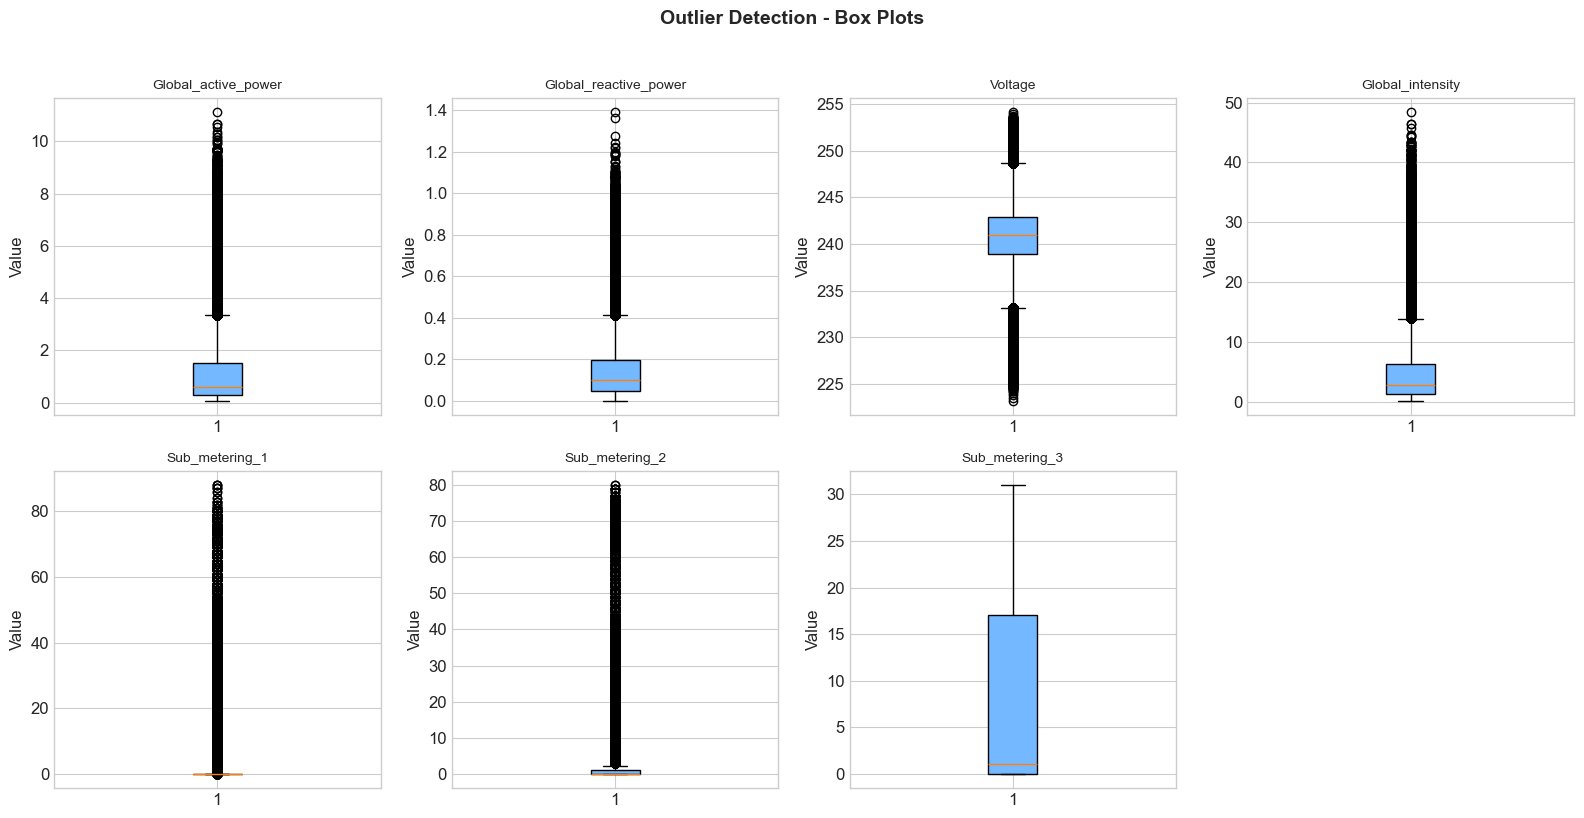

✅ Image saved: images/03_outlier_detection.png


In [12]:
# Visualize outliers using box plots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    box = ax.boxplot(df_cleaned[col].dropna(), patch_artist=True)
    box['boxes'][0].set_facecolor('#74b9ff')
    ax.set_title(col, fontsize=10)
    ax.set_ylabel('Value')

# Hide the last empty subplot
axes[-1].axis('off')

plt.suptitle('Outlier Detection - Box Plots', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('images/03_outlier_detection.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Image saved: images/03_outlier_detection.png")

In [13]:
# Outlier treatment: Cap to percentile bounds (Winsorization)
print("\n🔧 Treating Outliers (Winsorization at 1st and 99th percentile):")
print("=" * 60)

for col in numeric_cols:
    lower_cap = df_cleaned[col].quantile(0.01)
    upper_cap = df_cleaned[col].quantile(0.99)
    original_outliers = len(df_cleaned[(df_cleaned[col] < lower_cap) | (df_cleaned[col] > upper_cap)])
    df_cleaned[col] = df_cleaned[col].clip(lower=lower_cap, upper=upper_cap)
    print(f"   {col}: Capped {original_outliers:,} values to [{lower_cap:.2f}, {upper_cap:.2f}]")

print("\n✅ Outliers treated successfully!")


🔧 Treating Outliers (Winsorization at 1st and 99th percentile):


   Global_active_power: Capped 41,282 values to [0.11, 4.84]


   Global_reactive_power: Capped 20,752 values to [0.00, 0.48]


   Voltage: Capped 41,340 values to [232.16, 248.26]


   Global_intensity: Capped 40,498 values to [0.60, 20.60]


   Sub_metering_1: Capped 10,725 values to [0.00, 38.00]


   Sub_metering_2: Capped 19,799 values to [0.00, 36.00]


   Sub_metering_3: Capped 20,119 values to [0.00, 21.00]

✅ Outliers treated successfully!


### 3.4 Resampling Data (Hourly/Daily Aggregation)

In [14]:
# Hourly resampling
df_hourly = df_cleaned.resample('h').mean()
print("📊 Hourly Resampled Data:")
print(f"   Shape: {df_hourly.shape}")
print(f"   Date Range: {df_hourly.index.min()} to {df_hourly.index.max()}")

# Daily resampling
df_daily = df_cleaned.resample('D').mean()
print("\n📊 Daily Resampled Data:")
print(f"   Shape: {df_daily.shape}")
print(f"   Date Range: {df_daily.index.min()} to {df_daily.index.max()}")

print("\n✅ Data resampled successfully!")

📊 Hourly Resampled Data:
   Shape: (34589, 7)
   Date Range: 2006-12-16 17:00:00 to 2010-11-26 21:00:00



📊 Daily Resampled Data:
   Shape: (1442, 7)
   Date Range: 2006-12-16 00:00:00 to 2010-11-26 00:00:00

✅ Data resampled successfully!


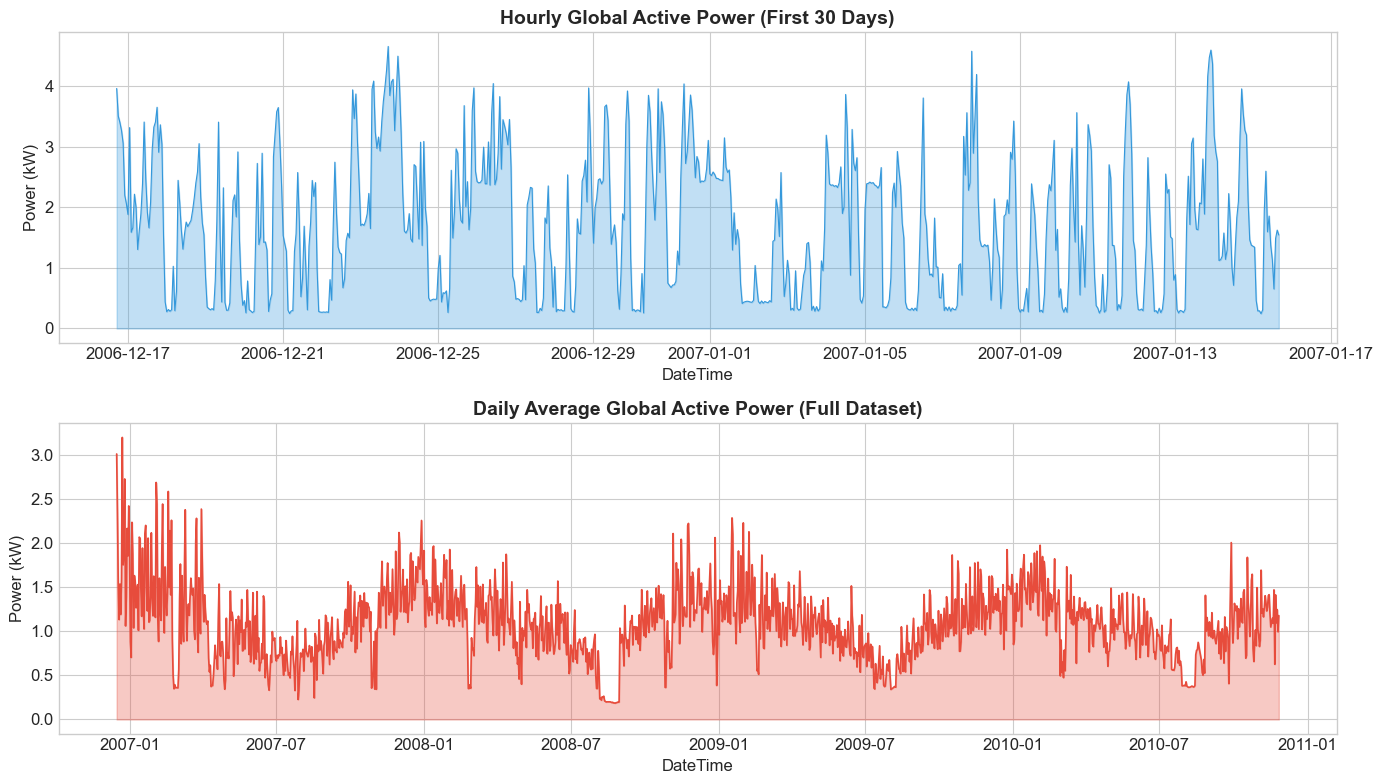

✅ Image saved: images/04_resampled_time_series.png


In [15]:
# Visualize resampled time series
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Hourly data (sample)
sample_hourly = df_hourly['Global_active_power'].iloc[:720]  # First 30 days
axes[0].plot(sample_hourly.index, sample_hourly.values, color='#3498db', linewidth=0.8)
axes[0].set_title('Hourly Global Active Power (First 30 Days)', fontweight='bold')
axes[0].set_xlabel('DateTime')
axes[0].set_ylabel('Power (kW)')
axes[0].fill_between(sample_hourly.index, sample_hourly.values, alpha=0.3, color='#3498db')

# Daily data
axes[1].plot(df_daily.index, df_daily['Global_active_power'].values, color='#e74c3c', linewidth=1.2)
axes[1].set_title('Daily Average Global Active Power (Full Dataset)', fontweight='bold')
axes[1].set_xlabel('DateTime')
axes[1].set_ylabel('Power (kW)')
axes[1].fill_between(df_daily.index, df_daily['Global_active_power'].values, alpha=0.3, color='#e74c3c')

plt.tight_layout()
plt.savefig('images/04_resampled_time_series.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Image saved: images/04_resampled_time_series.png")

### 3.5 Feature Engineering (Temporal Features)

In [16]:
# Add temporal features to hourly data
df_hourly['hour'] = df_hourly.index.hour
df_hourly['day'] = df_hourly.index.day
df_hourly['month'] = df_hourly.index.month
df_hourly['year'] = df_hourly.index.year
df_hourly['dayofweek'] = df_hourly.index.dayofweek
df_hourly['is_weekend'] = df_hourly['dayofweek'].isin([5, 6]).astype(int)

# Season mapping
def get_season(month):
    if month in [12, 1, 2]:
        return 0  # Winter
    elif month in [3, 4, 5]:
        return 1  # Spring
    elif month in [6, 7, 8]:
        return 2  # Summer
    else:
        return 3  # Autumn

df_hourly['season'] = df_hourly['month'].apply(get_season)

print("✅ Temporal features added!")
print("\n📊 New Features:")
print(df_hourly[['hour', 'day', 'month', 'year', 'dayofweek', 'is_weekend', 'season']].head(10))

✅ Temporal features added!

📊 New Features:
                     hour  day  month  year  dayofweek  is_weekend  season
DateTime                                                                  
2006-12-16 17:00:00    17   16     12  2006          5           1       0
2006-12-16 18:00:00    18   16     12  2006          5           1       0
2006-12-16 19:00:00    19   16     12  2006          5           1       0
2006-12-16 20:00:00    20   16     12  2006          5           1       0
2006-12-16 21:00:00    21   16     12  2006          5           1       0
2006-12-16 22:00:00    22   16     12  2006          5           1       0
2006-12-16 23:00:00    23   16     12  2006          5           1       0
2006-12-17 00:00:00     0   17     12  2006          6           1       0
2006-12-17 01:00:00     1   17     12  2006          6           1       0
2006-12-17 02:00:00     2   17     12  2006          6           1       0


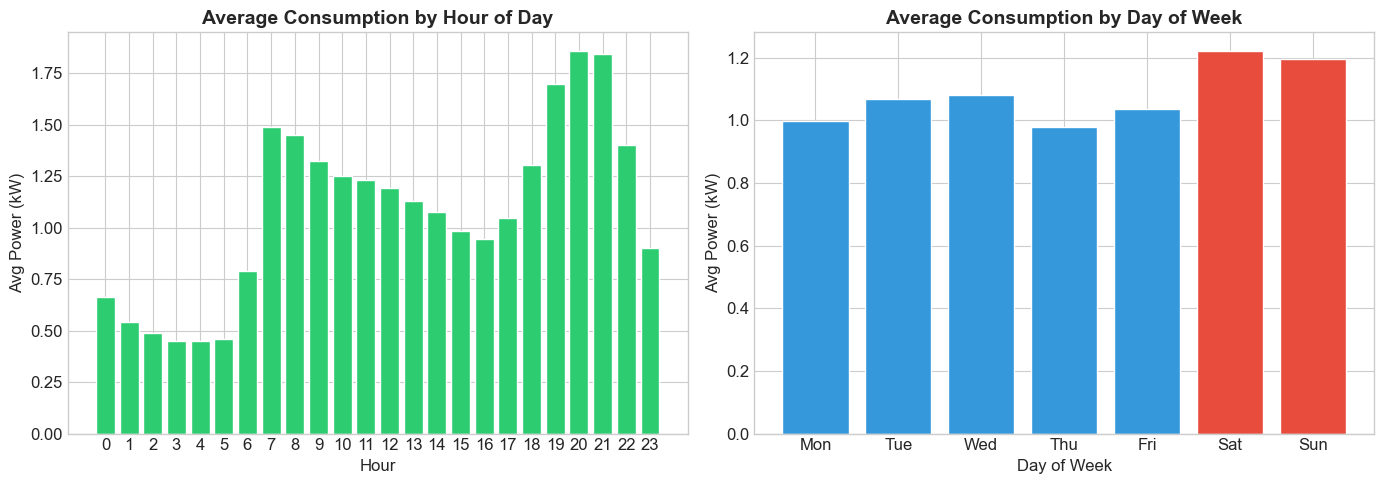

✅ Image saved: images/05_consumption_patterns.png


In [17]:
# Visualize hourly patterns
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Hourly consumption pattern
hourly_pattern = df_hourly.groupby('hour')['Global_active_power'].mean()
axes[0].bar(hourly_pattern.index, hourly_pattern.values, color='#2ecc71', edgecolor='white')
axes[0].set_title('Average Consumption by Hour of Day', fontweight='bold')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Avg Power (kW)')
axes[0].set_xticks(range(24))

# Day of week pattern
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
daily_pattern = df_hourly.groupby('dayofweek')['Global_active_power'].mean()
colors = ['#3498db'] * 5 + ['#e74c3c'] * 2  # Blue for weekdays, red for weekends
axes[1].bar(daily_pattern.index, daily_pattern.values, color=colors, edgecolor='white')
axes[1].set_title('Average Consumption by Day of Week', fontweight='bold')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Avg Power (kW)')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(day_names)

plt.tight_layout()
plt.savefig('images/05_consumption_patterns.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Image saved: images/05_consumption_patterns.png")

### 3.6 Correlation Analysis

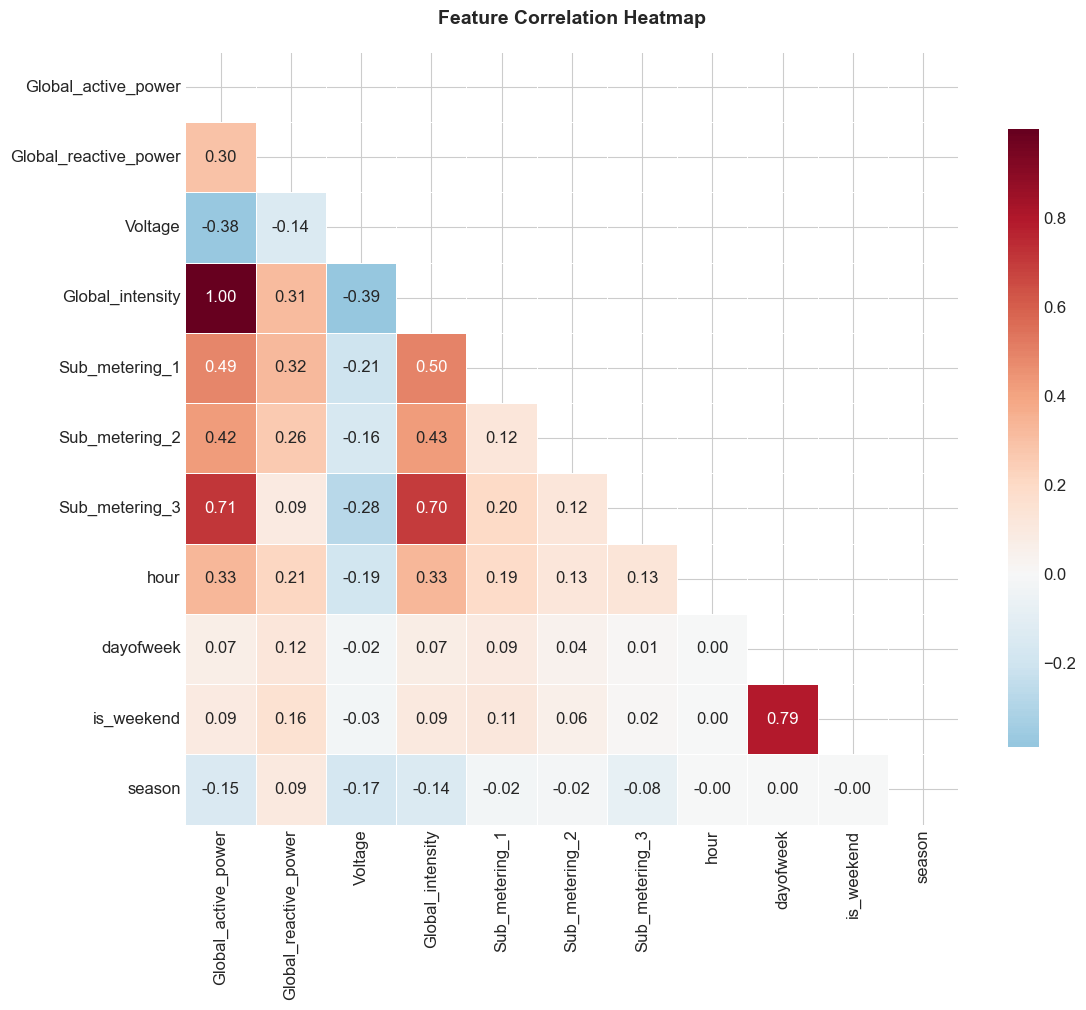

✅ Image saved: images/06_correlation_heatmap.png


In [18]:
# Correlation heatmap
correlation_cols = numeric_cols + ['hour', 'dayofweek', 'is_weekend', 'season']
corr_matrix = df_hourly[correlation_cols].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0, 
            fmt='.2f', square=True, linewidths=0.5,
            cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('images/06_correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Image saved: images/06_correlation_heatmap.png")

### 3.7 Normalization & Scaling

#### Why is Scaling Required?
1. **Magnitude Uniformity:** Features in this dataset have different units and ranges (e.g., Voltage is ~240V, while Global_active_power is ~1-5kW). ML models like Linear Regression and LSTMs are sensitive to the magnitude of features.
2. **Faster Convergence:** Gradient descent-based algorithms converge much faster when features are on a similar scale.
3. **Prevention of Bias:** Scaling prevents the model from being biased towards features with higher absolute values.

We compare **MinMaxScaler** (scales to [0,1]) and **StandardScaler** (Z-score normalization) below.

In [19]:
# Prepare data for scaling (using hourly data)
features_to_scale = numeric_cols
df_scaled = df_hourly.copy()

# MinMax Scaling
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(df_hourly[features_to_scale])
df_minmax = pd.DataFrame(minmax_scaled, columns=[f'{col}_minmax' for col in features_to_scale], index=df_hourly.index)

# Standard Scaling (Z-score normalization)
standard_scaler = StandardScaler()
standard_scaled = standard_scaler.fit_transform(df_hourly[features_to_scale])
df_standard = pd.DataFrame(standard_scaled, columns=[f'{col}_standard' for col in features_to_scale], index=df_hourly.index)

print("✅ Data Scaling Complete!")
print("\n📊 MinMax Scaled Data (range [0, 1]):")
print(df_minmax.describe().round(3))
print("\n📊 Standard Scaled Data (mean=0, std=1):")
print(df_standard.describe().round(3))

✅ Data Scaling Complete!

📊 MinMax Scaled Data (range [0, 1]):
       Global_active_power_minmax  Global_reactive_power_minmax  \
count                   34589.000                     34589.000   
mean                        0.200                         0.258   
std                         0.185                         0.135   
min                         0.000                         0.000   
25%                         0.043                         0.164   
50%                         0.141                         0.225   
75%                         0.306                         0.313   
max                         1.000                         1.000   

       Voltage_minmax  Global_intensity_minmax  Sub_metering_1_minmax  \
count       34589.000                34589.000              34589.000   
mean            0.539                    0.197                  0.029   
std             0.182                    0.182                  0.089   
min             0.000                    

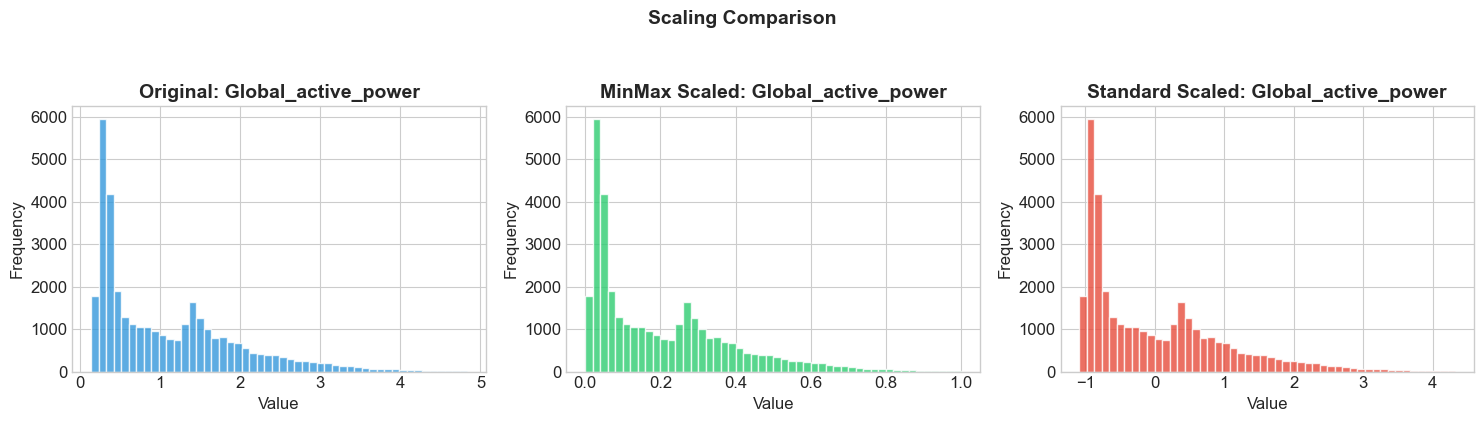

✅ Image saved: images/07_scaling_comparison.png


In [20]:
# Visualize scaling comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

col_to_show = 'Global_active_power'

# Original
axes[0].hist(df_hourly[col_to_show].dropna(), bins=50, color='#3498db', edgecolor='white', alpha=0.8)
axes[0].set_title(f'Original: {col_to_show}', fontweight='bold')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# MinMax Scaled
axes[1].hist(df_minmax[f'{col_to_show}_minmax'].dropna(), bins=50, color='#2ecc71', edgecolor='white', alpha=0.8)
axes[1].set_title(f'MinMax Scaled: {col_to_show}', fontweight='bold')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

# Standard Scaled
axes[2].hist(df_standard[f'{col_to_show}_standard'].dropna(), bins=50, color='#e74c3c', edgecolor='white', alpha=0.8)
axes[2].set_title(f'Standard Scaled: {col_to_show}', fontweight='bold')
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Frequency')

plt.suptitle('Scaling Comparison', fontsize=14, fontweight='bold', y=1.05)
plt.tight_layout()
plt.savefig('images/07_scaling_comparison.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Image saved: images/07_scaling_comparison.png")

### 3.8 Train/Validation/Test Split

In [21]:
# Time-series aware split (no shuffling to maintain temporal order)
# 70% train, 15% validation, 15% test

n = len(df_hourly)
train_end = int(n * 0.70)
val_end = int(n * 0.85)

df_train = df_hourly.iloc[:train_end]
df_val = df_hourly.iloc[train_end:val_end]
df_test = df_hourly.iloc[val_end:]

print("📊 Dataset Split Summary:")
print("=" * 60)
print(f"   Training Set:   {len(df_train):,} samples ({len(df_train)/n*100:.1f}%)")
print(f"   Validation Set: {len(df_val):,} samples ({len(df_val)/n*100:.1f}%)")
print(f"   Test Set:       {len(df_test):,} samples ({len(df_test)/n*100:.1f}%)")
print(f"\n   Total:          {n:,} samples")

print("\n📅 Date Ranges:")
print(f"   Training:   {df_train.index.min()} to {df_train.index.max()}")
print(f"   Validation: {df_val.index.min()} to {df_val.index.max()}")
print(f"   Test:       {df_test.index.min()} to {df_test.index.max()}")

📊 Dataset Split Summary:
   Training Set:   24,212 samples (70.0%)
   Validation Set: 5,188 samples (15.0%)
   Test Set:       5,189 samples (15.0%)

   Total:          34,589 samples

📅 Date Ranges:
   Training:   2006-12-16 17:00:00 to 2009-09-20 12:00:00
   Validation: 2009-09-20 13:00:00 to 2010-04-24 16:00:00
   Test:       2010-04-24 17:00:00 to 2010-11-26 21:00:00


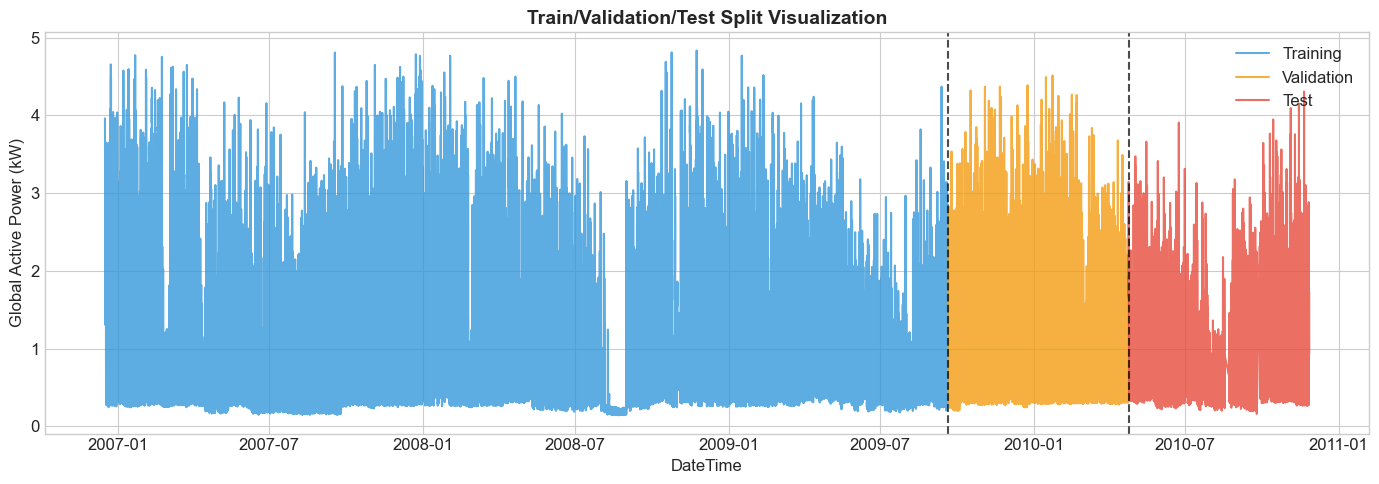

✅ Image saved: images/08_data_split_visualization.png


In [22]:
# Visualize data split
fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(df_train.index, df_train['Global_active_power'], label='Training', color='#3498db', alpha=0.8)
ax.plot(df_val.index, df_val['Global_active_power'], label='Validation', color='#f39c12', alpha=0.8)
ax.plot(df_test.index, df_test['Global_active_power'], label='Test', color='#e74c3c', alpha=0.8)

ax.axvline(df_val.index.min(), color='black', linestyle='--', linewidth=1.5, alpha=0.7)
ax.axvline(df_test.index.min(), color='black', linestyle='--', linewidth=1.5, alpha=0.7)

ax.set_title('Train/Validation/Test Split Visualization', fontsize=14, fontweight='bold')
ax.set_xlabel('DateTime')
ax.set_ylabel('Global Active Power (kW)')
ax.legend(loc='upper right')

plt.tight_layout()
plt.savefig('images/08_data_split_visualization.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Image saved: images/08_data_split_visualization.png")

---

## 4️⃣ Summary & Conclusions

### Milestone 1 Achievements:

#### Module 1: Data Collection and Understanding
- ✅ Loaded and explored 2,075,259 minute-level energy consumption records
- ✅ Identified 1.25% missing values across all numerical columns
- ✅ Organized device-level energy data (Kitchen, Laundry, Climate Control)
- ✅ Performed comprehensive exploratory data analysis

#### Module 2: Data Cleaning and Preprocessing
- ✅ Handled missing values using interpolation and forward/backward fill
- ✅ Detected and treated outliers using IQR method and Winsorization
- ✅ Created DateTime index and extracted temporal features
- ✅ Resampled data to hourly and daily granularity
- ✅ Applied MinMax and Standard scaling for normalization
- ✅ Split data into train (70%), validation (15%), and test (15%) sets

### Key Observations:
1. **HVAC (Sub_metering_3)** has the highest average consumption (~6.4 Wh)
2. **Peak hours** are morning (7-9 AM) and evening (6-9 PM)
3. **Weekend patterns** differ from weekdays
4. Strong correlation between `Global_active_power` and `Global_intensity`

### All Saved Visualizations:
1. `images/01_missing_values_analysis.png`
2. `images/02_device_level_distribution.png`
3. `images/03_outlier_detection.png`
4. `images/04_resampled_time_series.png`
5. `images/05_consumption_patterns.png`
6. `images/06_correlation_heatmap.png`
7. `images/07_scaling_comparison.png`
8. `images/08_data_split_visualization.png`

In [23]:
# Final summary statistics
print("📊 MILESTONE 1 COMPLETE!")
print("=" * 60)
print(f"\n📁 Processed Data Summary:")
print(f"   Original Records: 2,075,259")
print(f"   Hourly Records: {len(df_hourly):,}")
print(f"   Daily Records: {len(df_daily):,}")
print(f"\n📊 Missing Values: {missing_before:,} → 0")
print(f"\n🖼️ Visualizations Saved: 8 images in 'images/' folder")
print("\n✅ Ready for Milestone 2: Feature Engineering & Modeling!")

📊 MILESTONE 1 COMPLETE!

📁 Processed Data Summary:
   Original Records: 2,075,259
   Hourly Records: 34,589
   Daily Records: 1,442

📊 Missing Values: 181,853 → 0

🖼️ Visualizations Saved: 8 images in 'images/' folder

✅ Ready for Milestone 2: Feature Engineering & Modeling!


## 4️⃣ Saving Processed Data
Saving the cleaned and processed dataframe for use in Milestone 2 (Feature Engineering & Modeling).

In [24]:
# Save to CSV (one level up in Dataset folder)
import os
output_dir = '../Dataset'
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'cleaned_household_power_consumption.csv')
df_hourly.to_csv(output_path)
print(f"✅ Processed hourly data saved to {output_path}")

✅ Processed hourly data saved to ../Dataset\cleaned_household_power_consumption.csv
